# Шаг 6. Проверка гипотез

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid", palette="husl")

## Импорт датафрейма

In [3]:
df = pd.read_csv('data/df_after_step05.csv', index_col=0)
df

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,workday,first_workday,second_workday,imoex_vol,ru_monetary,us_monetary
09.10.2008,26.1629,767.98,11.0,1.40,637.93,700.37,100.91,100.867301,workday,0,0,62.44,0.08,-9.007613
10.10.2008,26.0695,743.23,11.0,1.40,0.00,700.37,100.91,100.867301,workday,0,0,700.37,0.08,-9.007613
13.10.2008,26.0695,743.23,11.0,1.40,700.37,666.37,100.91,100.867301,workday,1,0,-34.00,0.08,-9.007613
14.10.2008,26.1111,726.16,11.0,1.40,666.81,755.22,100.91,100.867301,workday,0,1,88.41,0.08,-9.007613
15.10.2008,26.0871,712.49,11.0,1.40,755.22,689.71,100.91,100.867301,workday,0,0,-65.51,0.08,-9.007613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.02.2023,74.8596,4442.45,7.5,4.65,2215.43,2212.40,100.46,99.631358,workday,0,0,-3.03,1.98,9.073699
24.02.2023,74.8596,4442.45,7.5,4.65,2209.10,2208.03,100.46,99.631358,day off,0,0,-1.07,1.98,9.073699
27.02.2023,74.8596,4442.45,7.5,4.65,2194.39,2241.10,100.46,99.631358,workday,1,0,46.71,1.98,9.073699
28.02.2023,75.4323,4391.92,7.5,4.65,2246.26,2253.16,100.46,99.631358,workday,0,1,6.90,1.98,9.073699


## Проверка гипотез
При проверке всех гипотез используется уровень значимости ($\alpha$) = 0.05.
### 1. Разница между ценой открытия и закрытия IMOEX стастистически не значима

$$
\begin{aligned}
& H_0: \mu_{x} = \mu_{y} \\
& H_1: \mu_{x} \neq \mu_{y}
\end{aligned}
$$

где $\mu_{x}$ - математическое ожидание цены открытия, $\mu_{y}$ - математическое ожидание цены закрытия

Также важно упомянуть, что истинные дисперсии двух значений нам неизвестны, но мы принимаем их равными друг другу.

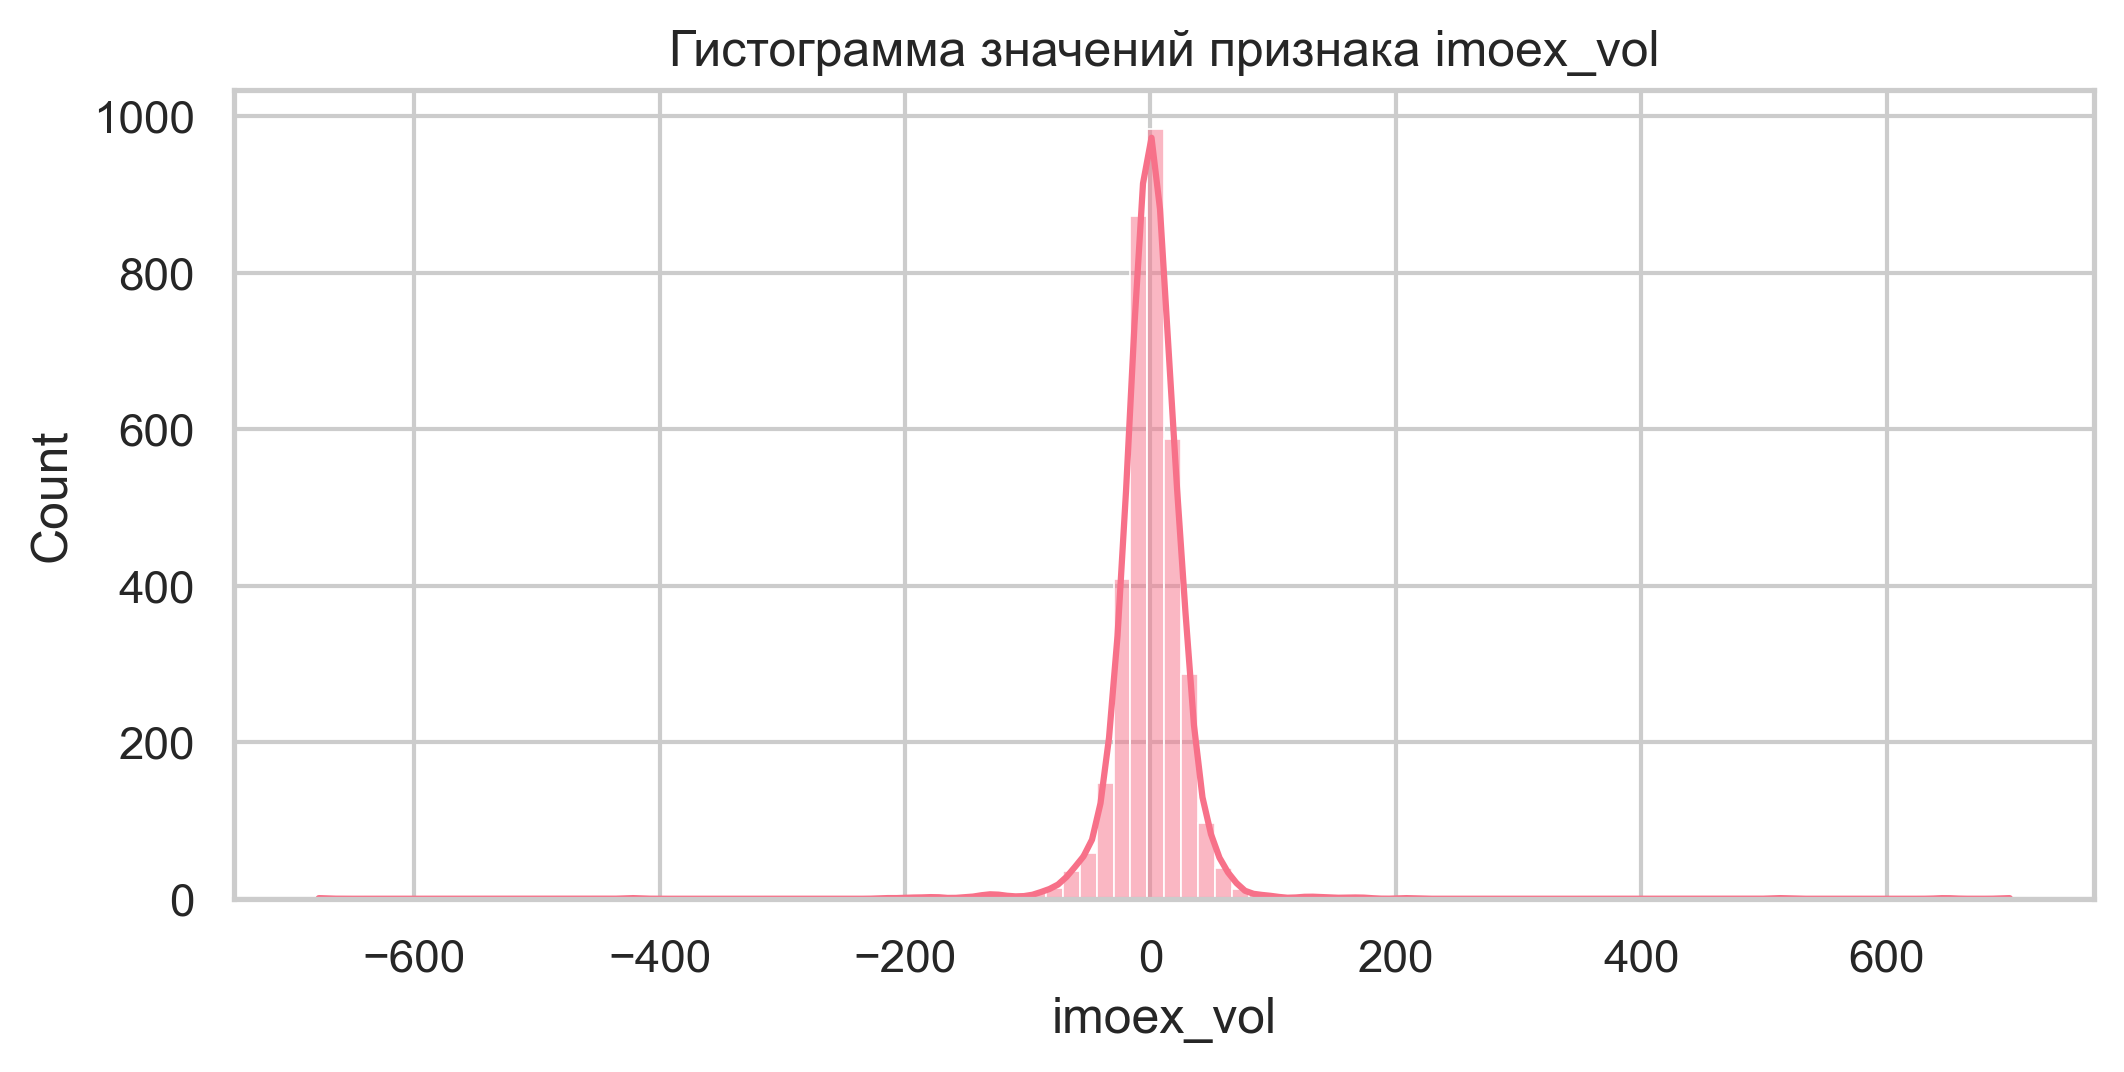

In [21]:
##Посмотрим на график разницы для проверки на нормальность

plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака imoex_vol')
sns.histplot(df.imoex_vol, bins=100, kde=True);

Очень много выбросов, надо смотреть без них

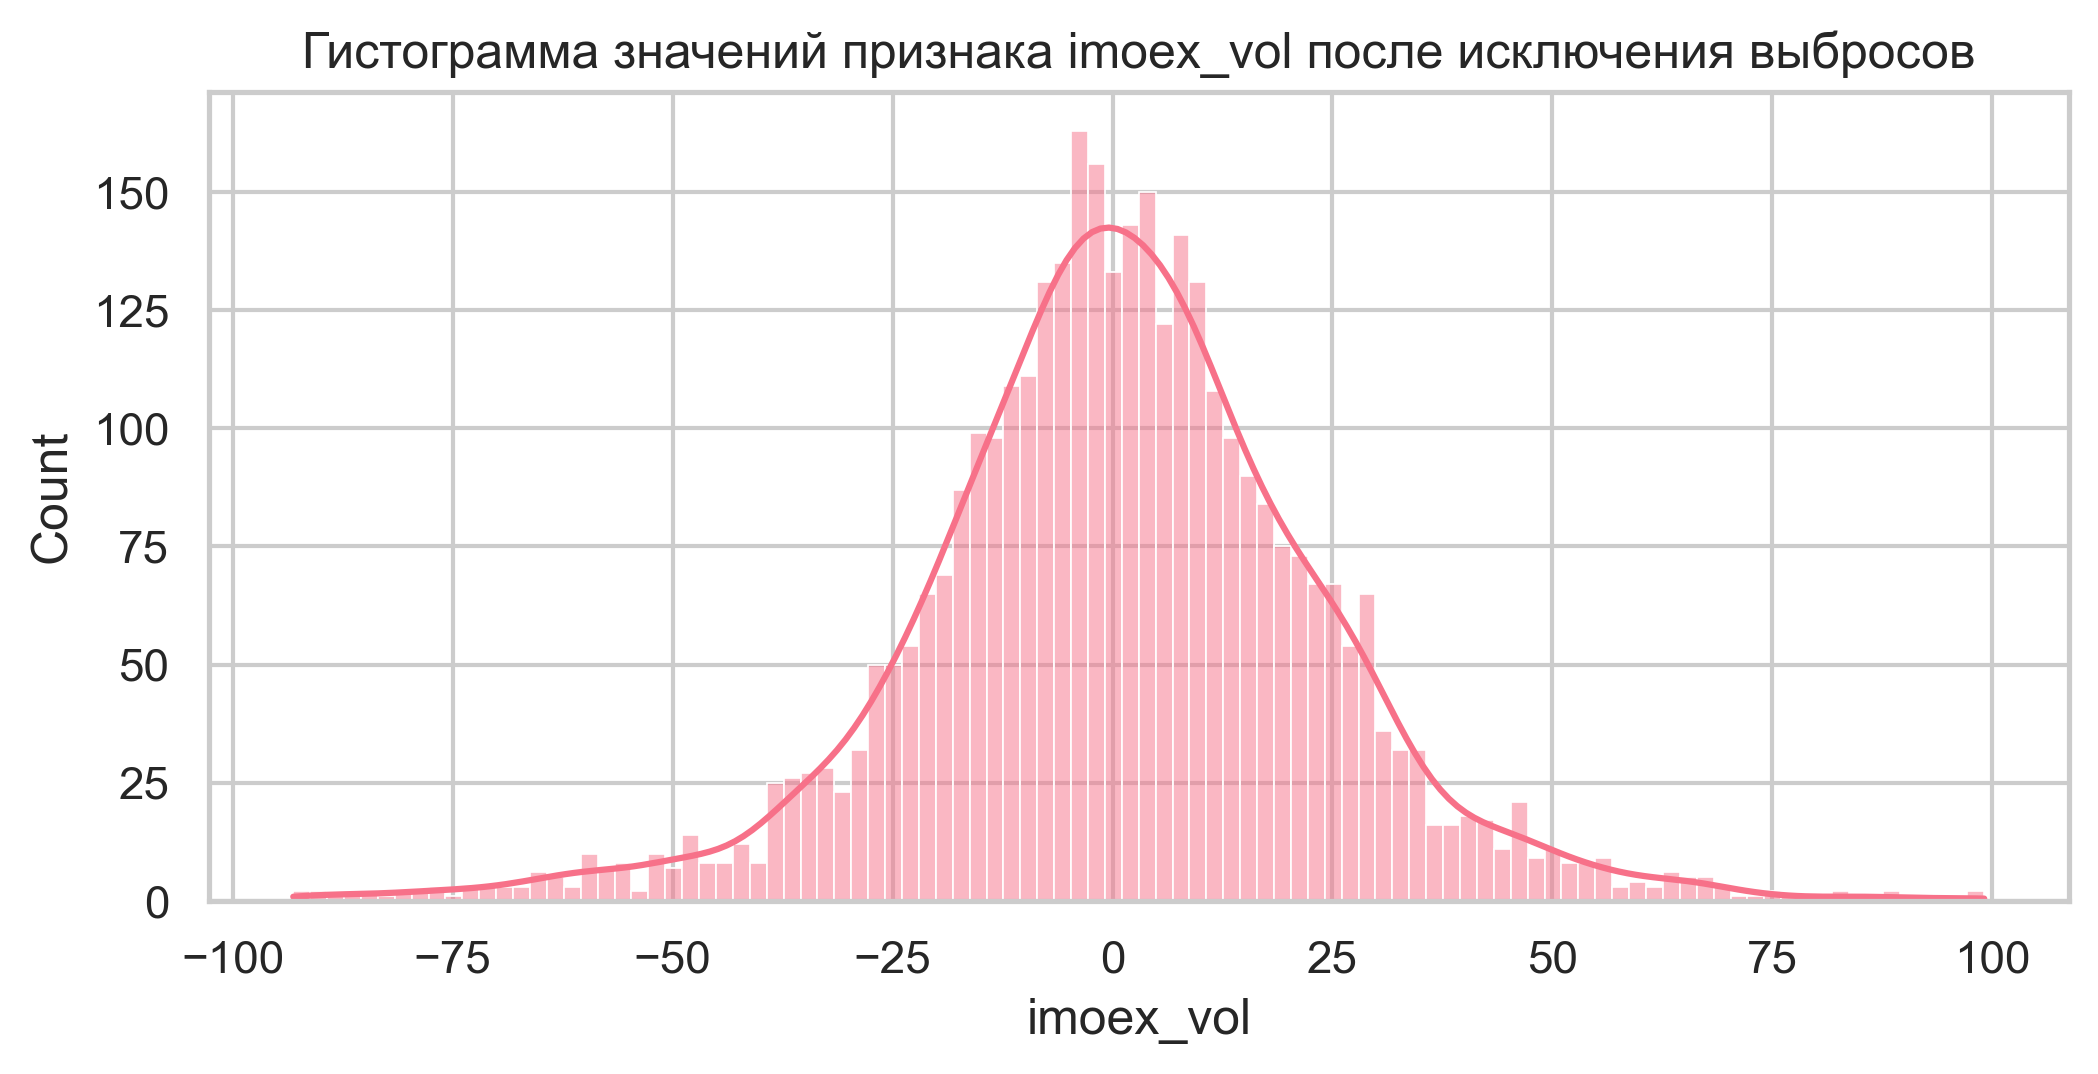

In [22]:
imoex_vol_no_outliers = df.imoex_vol[(df.imoex_vol<100) & (df.imoex_vol>-100)]


plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака imoex_vol после исключения выбросов')
sns.histplot(imoex_vol_no_outliers, bins=100, kde=True);

Похоже на нормальное, проверим чуть более тщательно

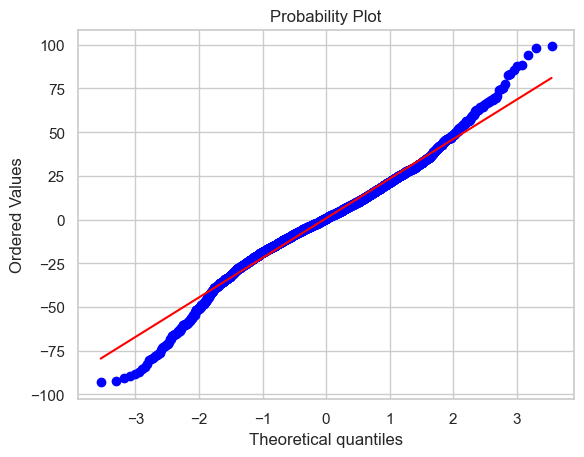

In [24]:
stats.probplot(imoex_vol_no_outliers, dist="norm", plot=plt);

Действительно похоже на нормальное, можно использовать t-test!

In [25]:
var_im_open = df.imoex_open.var()
var_im_close = df.imoex_close.var()  

# Вычисляем несмещённую дисперсию и среднее по нашим данным
mean_im_open = df.imoex_open.mean()
mean_im_close = df.imoex_close.mean()

 # Для формальности, посчитаем количество и тех и тех наблюдений
n_im_open = len(df.imoex_open)                 
n_im_close = len(df.imoex_close)

In [26]:
# Подсчитываем дисперсию для t-статистики
var_im_0 = ((n_im_open - 1)*var_im_open + (n_im_close - 1)*var_im_close)/ (n_im_open + n_im_close -2)

In [27]:
t_stat_im = (mean_im_open - mean_im_close)/(((1/n_im_open + 1/n_im_close)*var_im_0)*(1/2))
t_stat_im

-0.0033809906402275784

In [28]:
alpha = 0.05
# Посчитали критические значения для выбранного уровня значимости
t_crit_1 = stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2) 
t_crit_2 = - stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2)

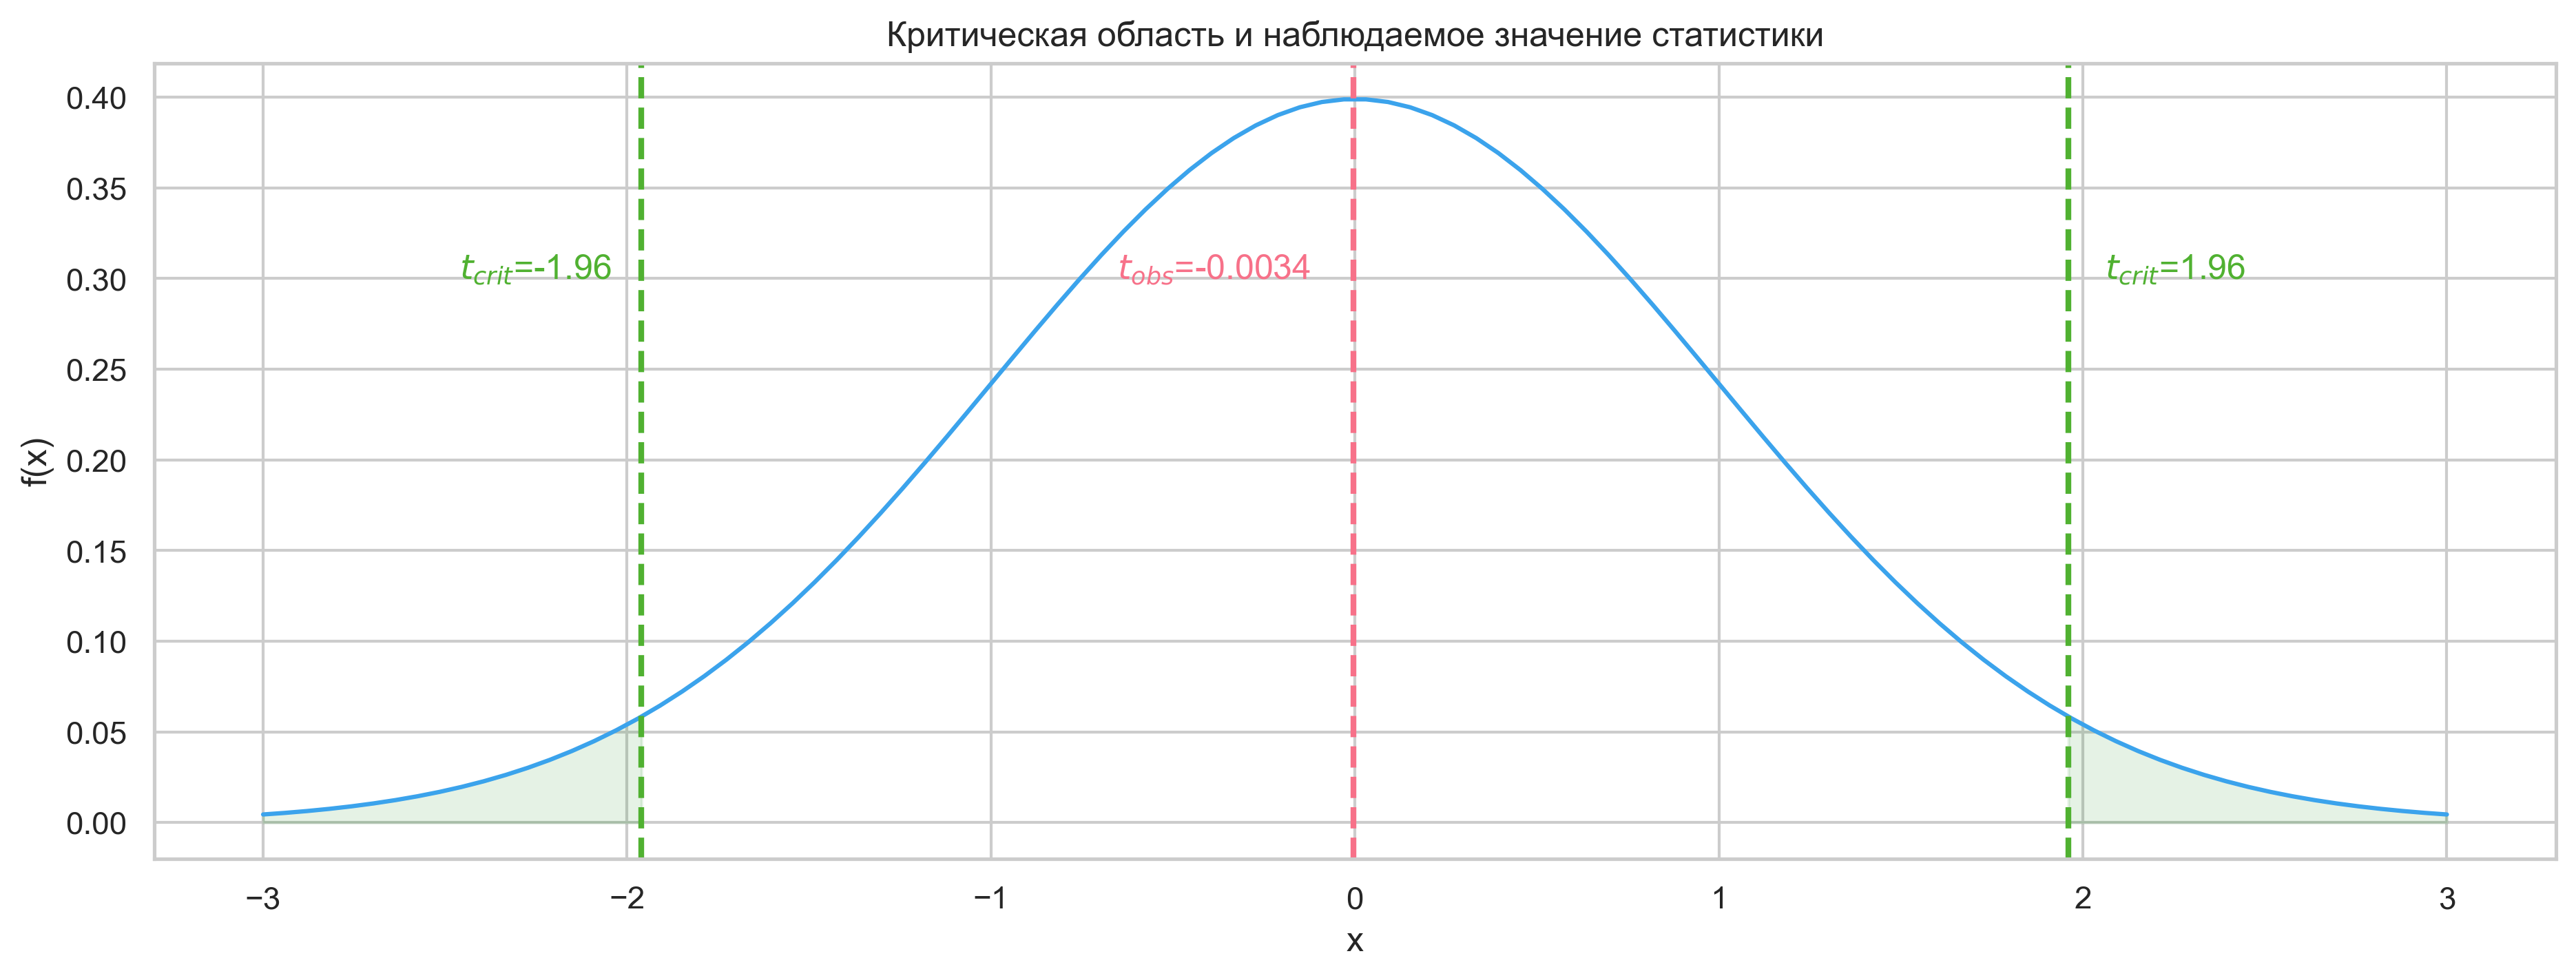

In [30]:
pal = sns.color_palette('husl', 3)

fig, ax = plt.subplots(figsize = (15, 5), dpi=300)

plt.title('Критическая область и наблюдаемое значение статистики')

x = np.linspace(-3, 3, 100)
ax.plot(x, stats.t.pdf(x, df=n_im_open+n_im_close-2), color=pal[2])
plt.ylabel('f(x)', fontsize=12)
plt.xlabel('x', fontsize=12)

plt.axvline(t_stat_im, color=pal[0], linestyle="--", lw=2)
plt.axvline(t_crit_1, color=pal[1], linestyle="--", lw=2)
plt.axvline(t_crit_2, color=pal[1], linestyle="--", lw=2)

xq1 = np.linspace(-3, t_crit_2, 100)
yq1 = stats.t.pdf(xq1, df = n_im_open+n_im_close-2)
plt.fill_between(xq1, 0, yq1, color='green', alpha=0.1)
xq2 = np.linspace(t_crit_1,3, 100)
yq2 = stats.t.pdf(xq2, df = n_im_open+n_im_close-2)
plt.fill_between(xq2, 0, yq2, color='green', alpha=0.1)

crit = '$t_{crit}$'
obs = '$t_{obs}$'
plt.text(t_crit_2 - 0.5, 0.3, f'{crit}={round(t_crit_2,2)}', color=pal[1], fontsize=12)
plt.text(t_crit_1 + 0.1, 0.3,  f'{crit}={round(t_crit_1,2)}', color=pal[1], fontsize=12)
plt.text(t_stat_im - 0.65, 0.3, f'{obs}={round(t_stat_im,4)}', color=pal[0], fontsize=12);

> Из графика можем видеть, что полученная статистика не попадает в критическую область при выбранном нами уровне значимости (и при любом разумном уровне), а следовательно нулевая гипотеза не отвергается, то есть, –__разница между ценой открытия и закрытия IMOEX действительно статистически незначима__

### 2. Инфляции не существует

Учитывая, что индекс потребительских цен по отношению к предыдущему месяцу слабо колеблется около 100, можно попробовать проверить интересную гипотезу, что увеличение этого индекса (то есть, инфляция) статистически не значимо.

$$
\begin{aligned}
& H_0: \mu_{x} = 100 \\
& H_1: \mu_{x} > 100
\end{aligned}
$$

где $\mu_{x}$ - математическое ожидание индекса потребительских цен по отношению к предыдущему месяцу


#### Инфляции не существует в России
Сперва следует проверить данные на нормальность:

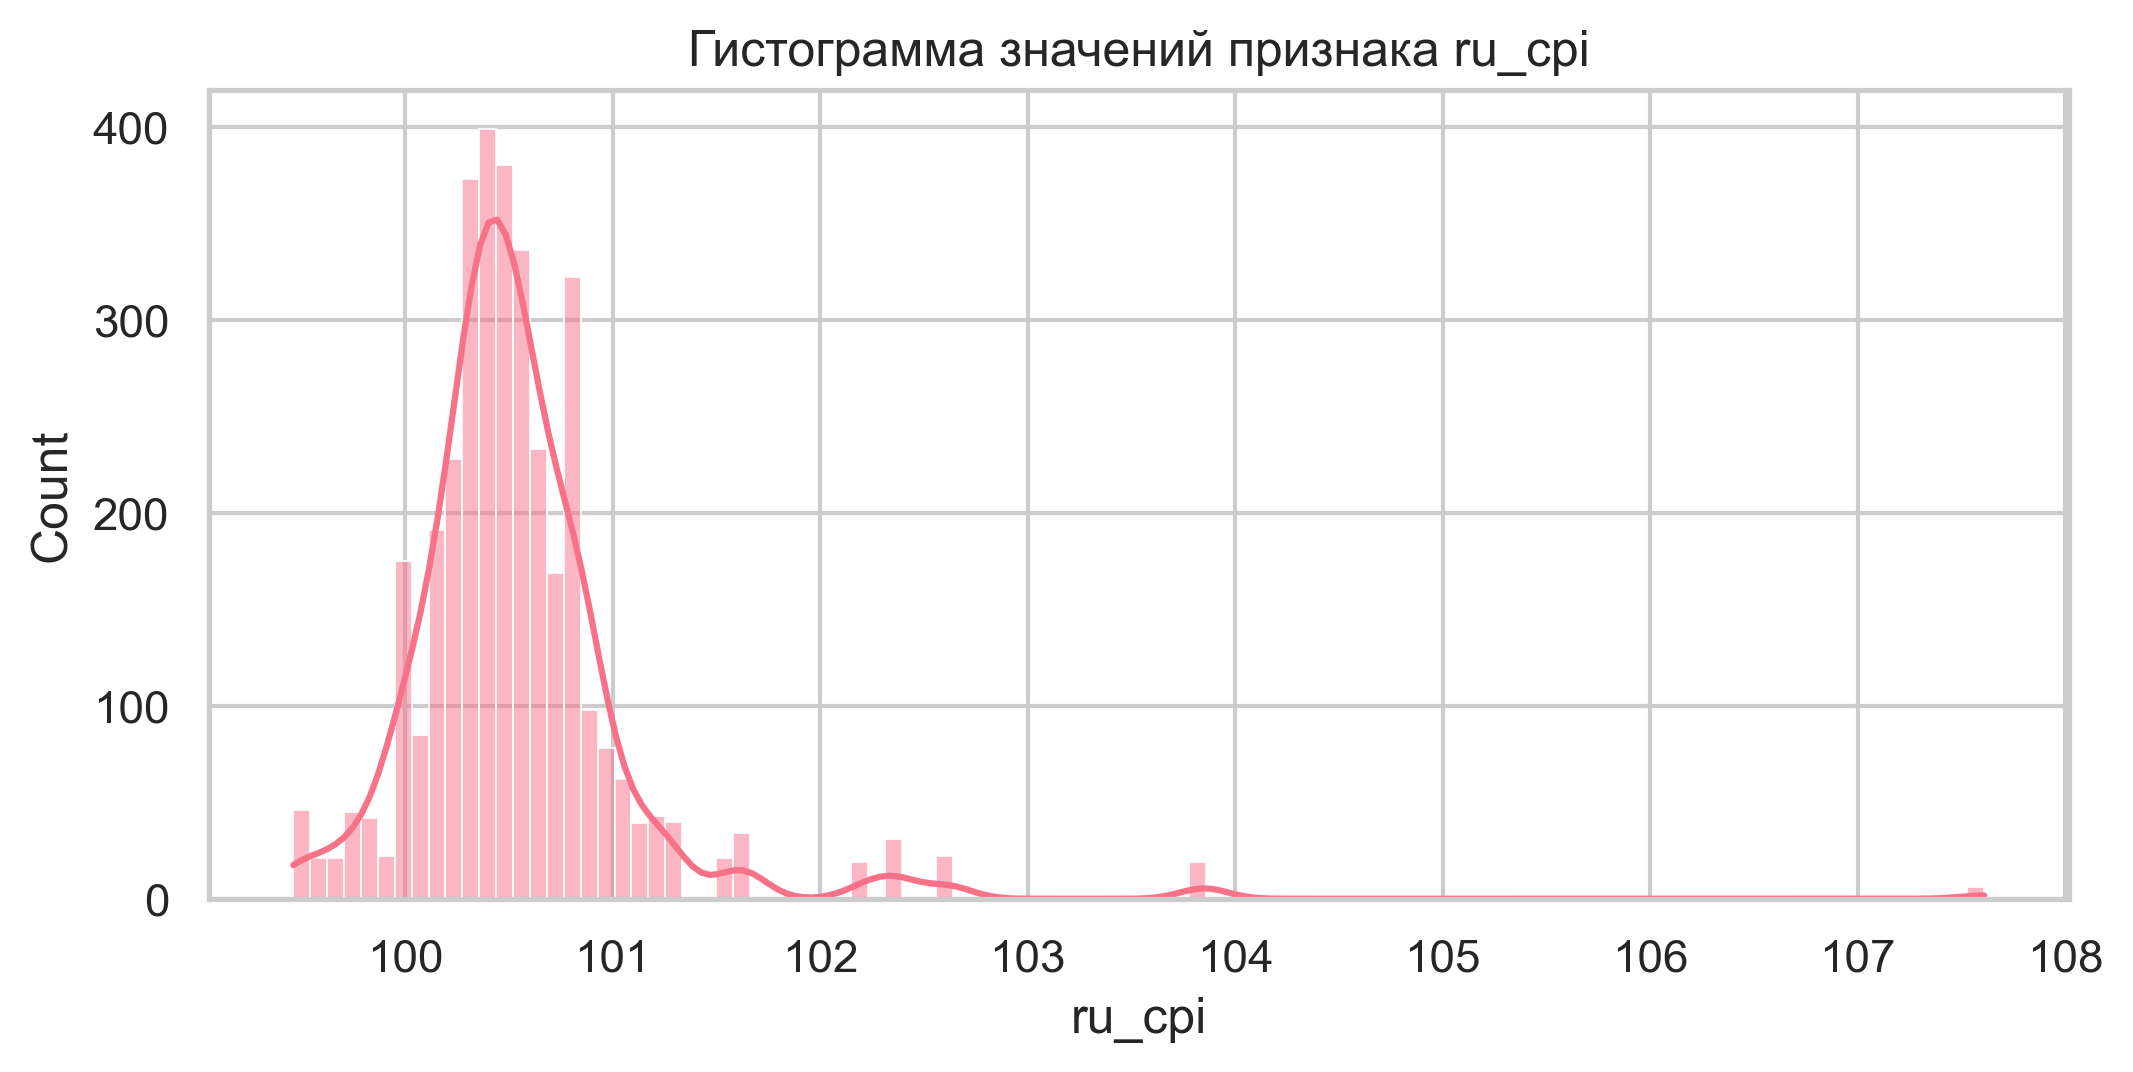

In [34]:
plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака ru_cpi')

sns.histplot(df.ru_cpi, bins=100, kde=True);

Отдаленно напоминает нормальное распределение, но есть выбросы. Избавимся от них:

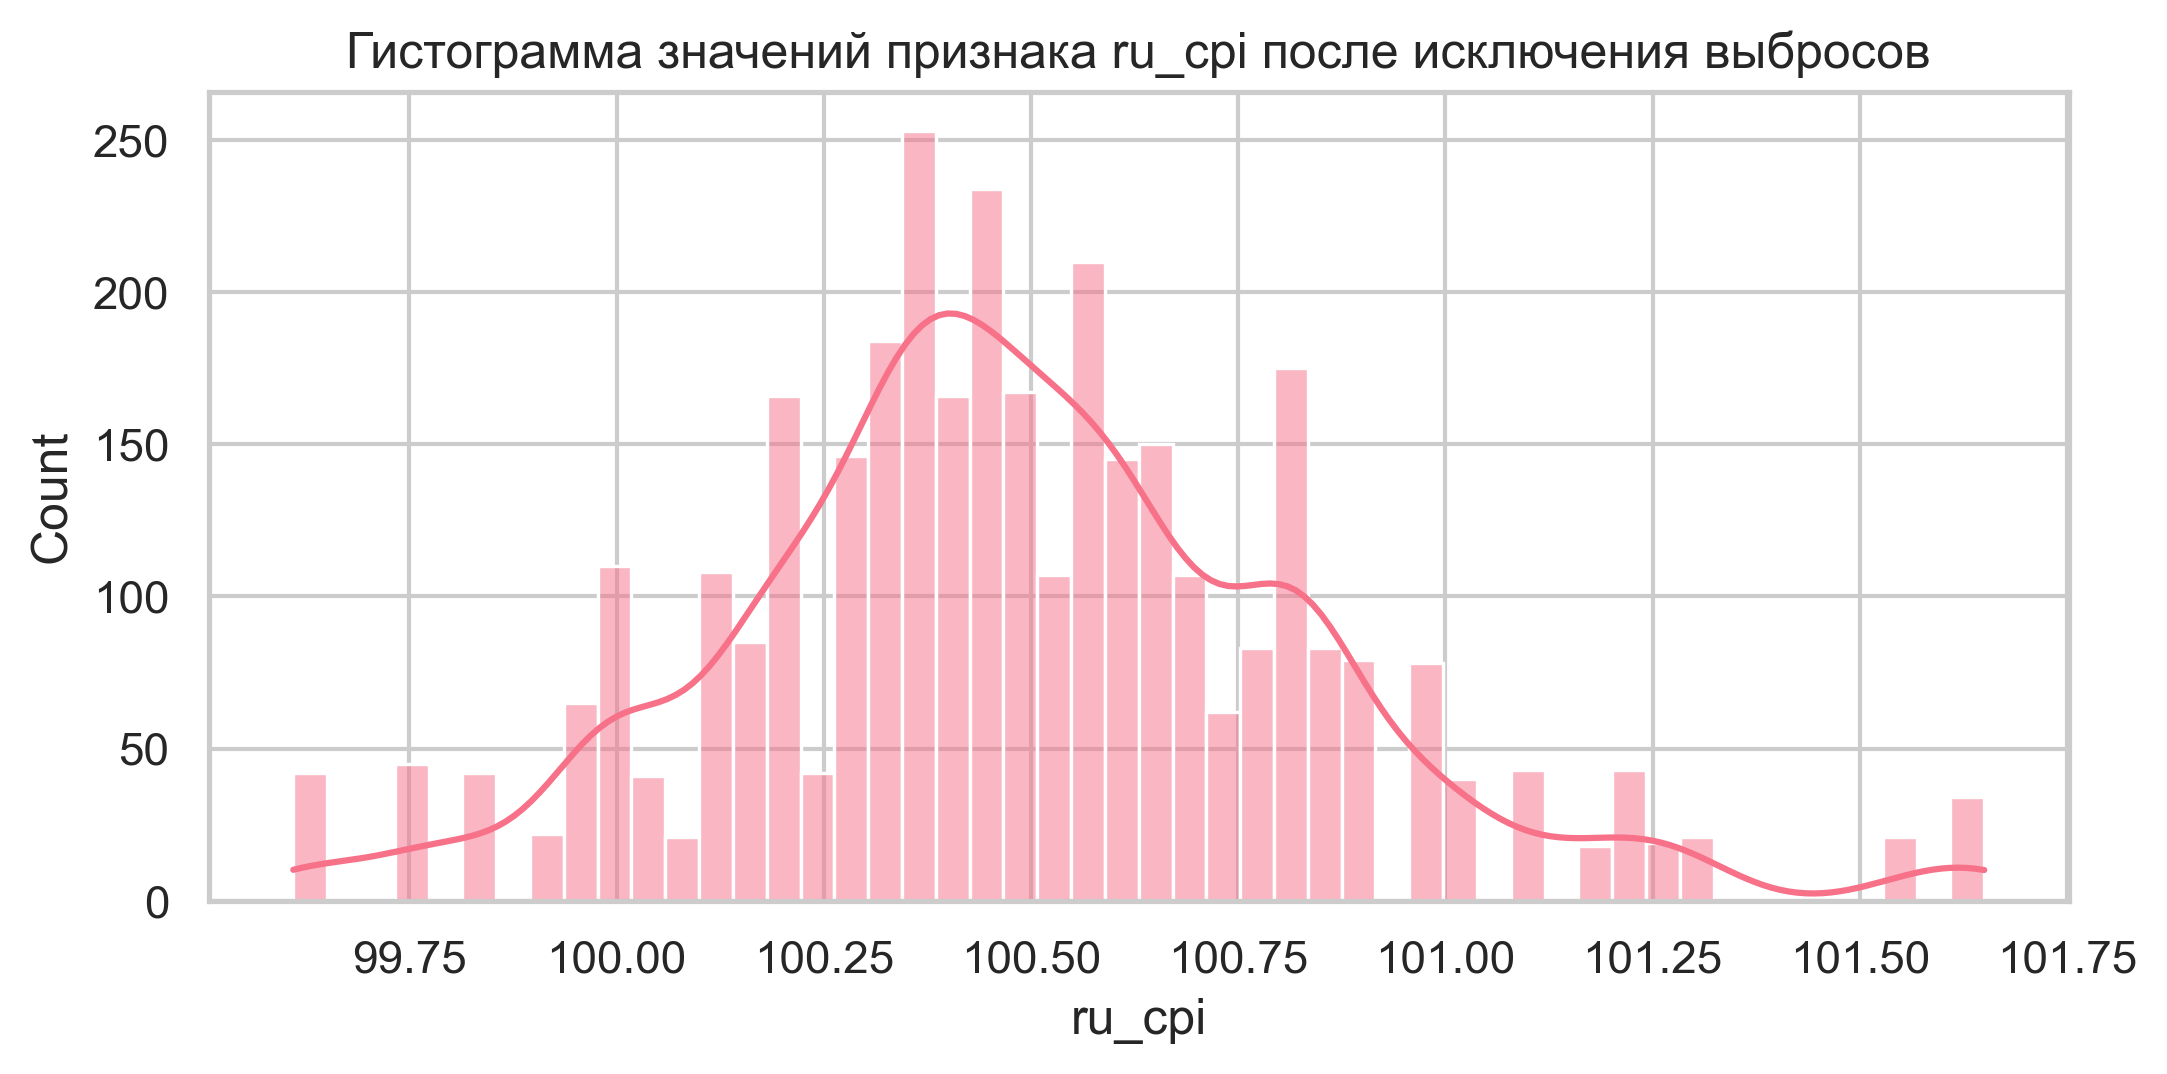

In [70]:
plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака ru_cpi после исключения выбросов')

sns.histplot(df.ru_cpi.loc[(df.ru_cpi<102) & (df.ru_cpi>=99.5)], bins=50, kde=True);

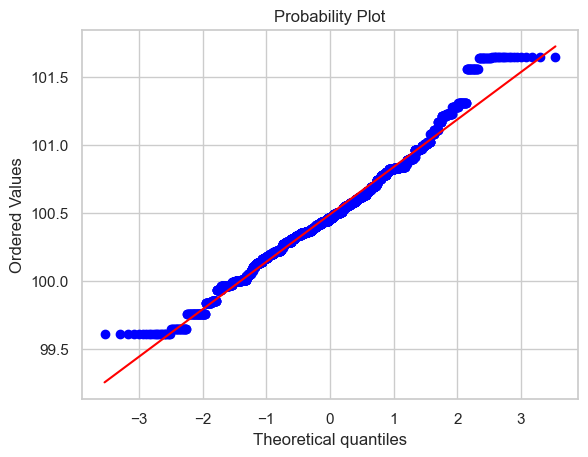

In [72]:
stats.probplot(df.ru_cpi.loc[(df.ru_cpi<102) & (df.ru_cpi>=99.5)], dist="norm", plot=plt);

Всё же, как бы нам ни хотелось, распределение не нормальное.

Тогда будем использовать непараметрический `тест Уилкоксона` для одной выборки.

In [73]:
stat, p_value = stats.wilcoxon(df.ru_cpi-100, alternative='greater')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


> Из того, что гипотеза отвергается, можно сделать вывод, что __инфляция в России существует__, и отклонение ИПЦ от 100 значимо и видно даже на ежемесячном уровне

#### Инфляции не существует в США
Сперва следует проверить данные на нормальность:

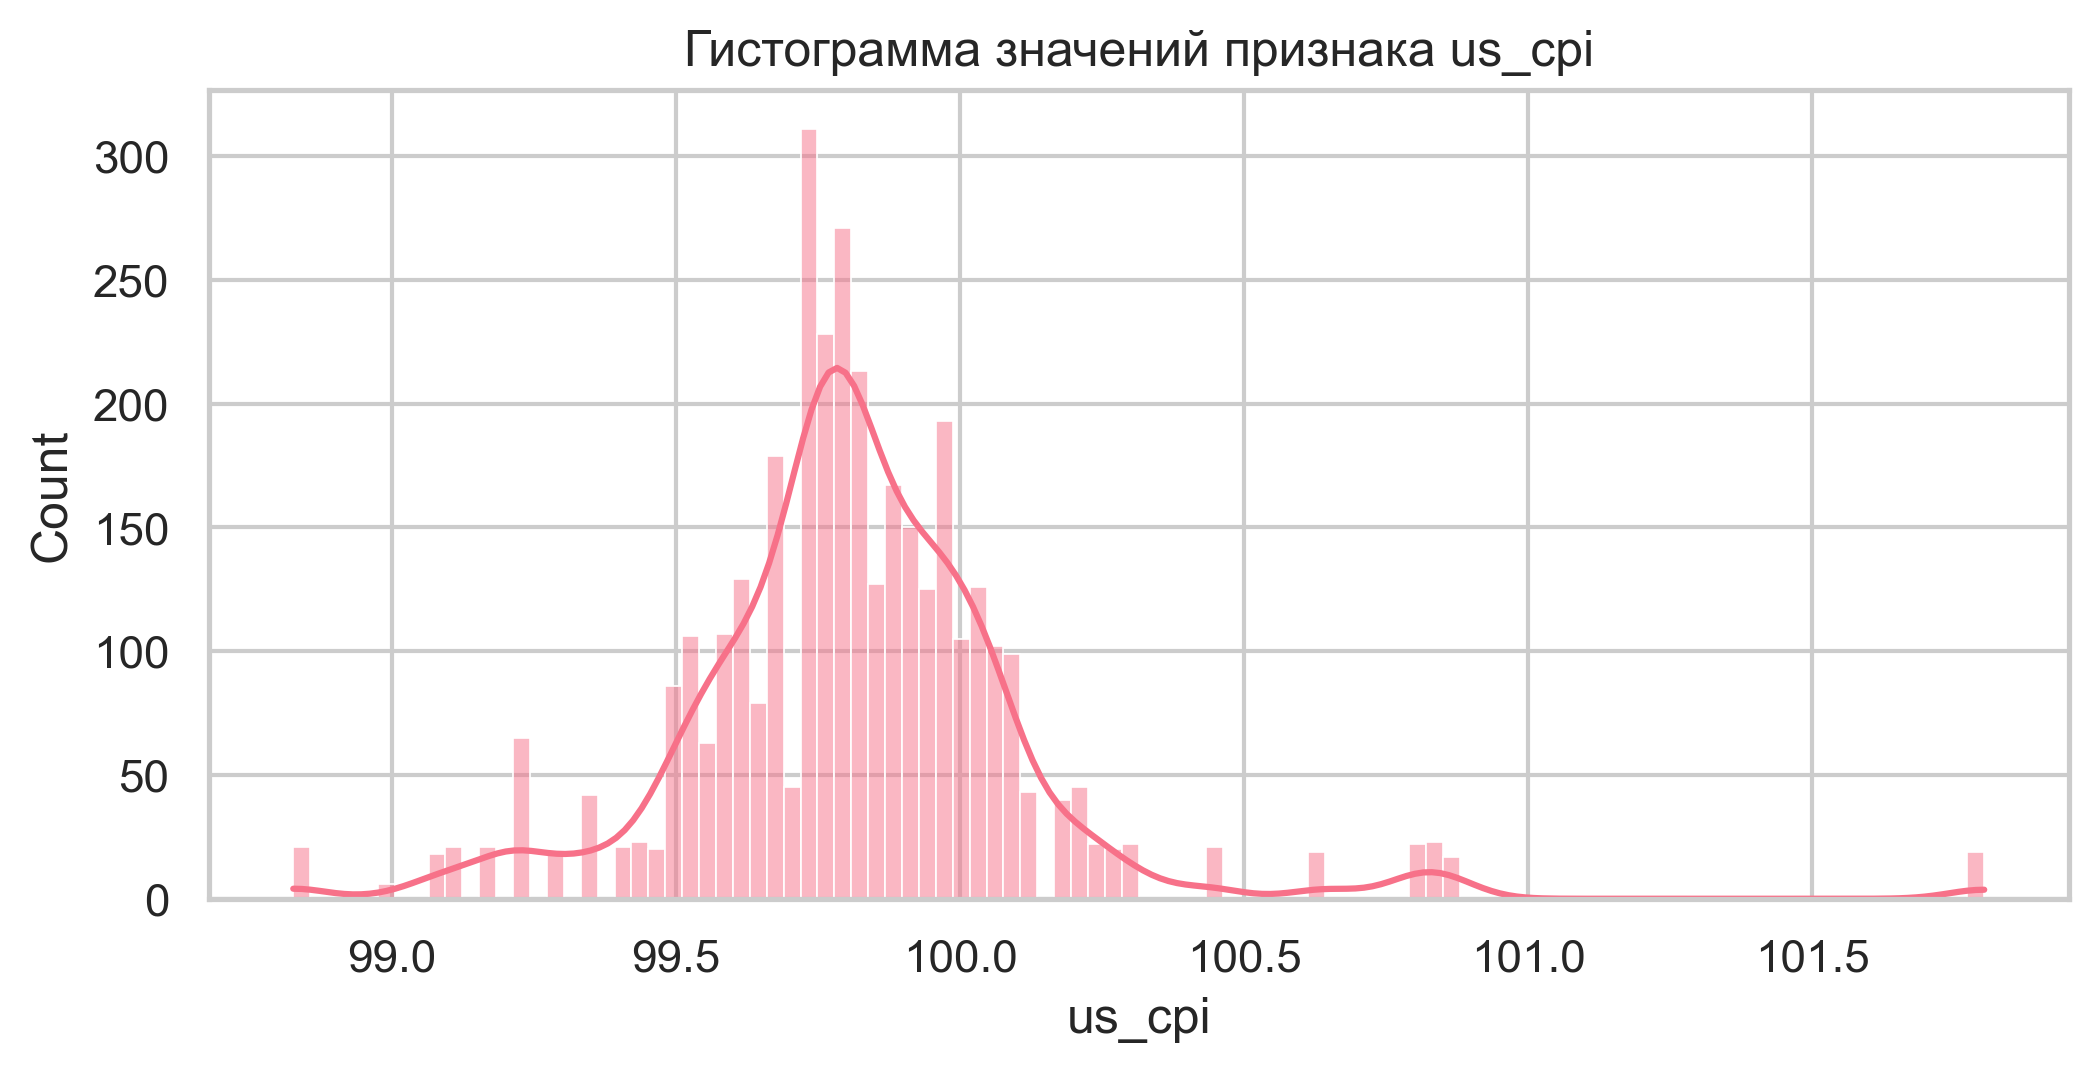

In [44]:
plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака us_cpi')

sns.histplot(df.us_cpi, bins=100, kde=True);

Здесь тоже есть выбросы. Избавимся от них:

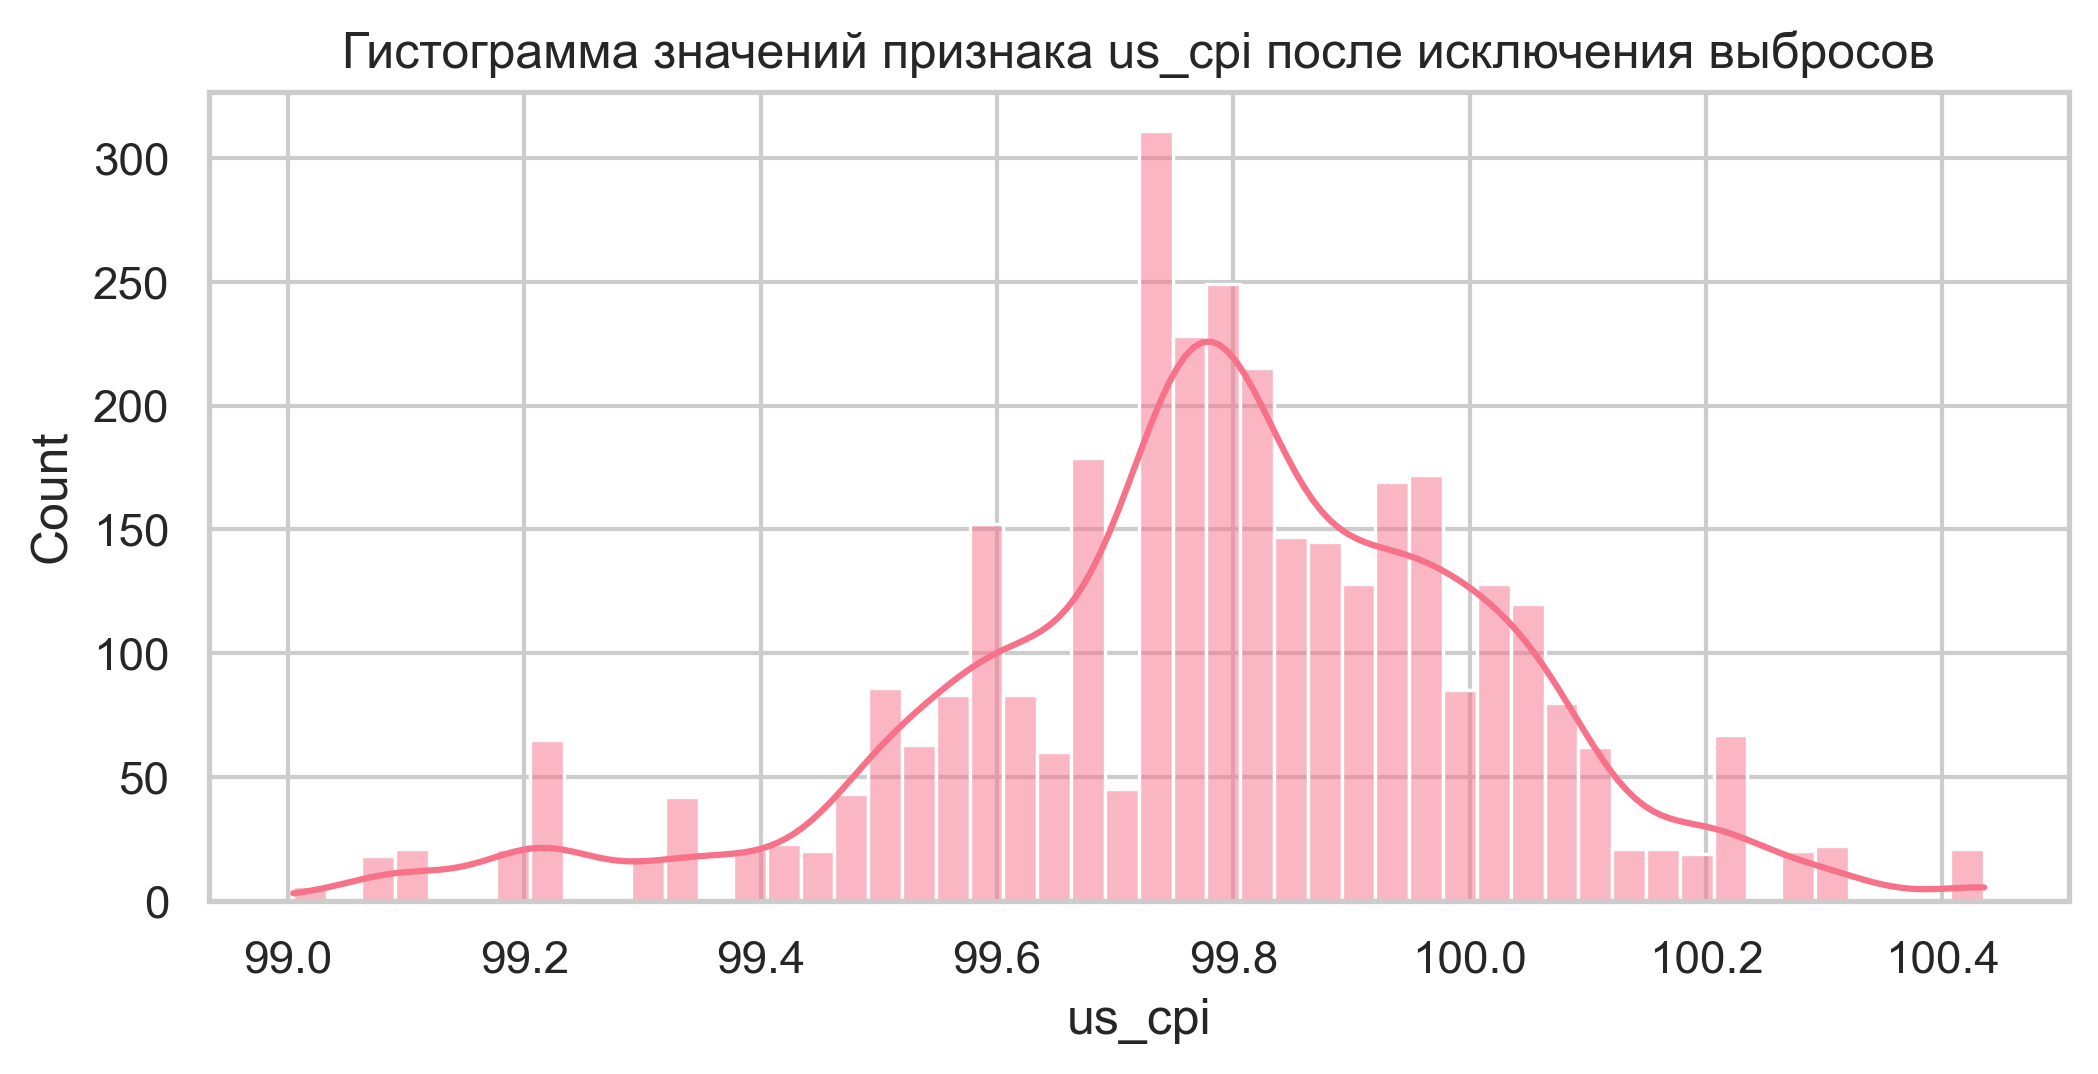

In [79]:
plt.figure(figsize=(8,3.5), dpi=300)

plt.title('Гистограмма значений признака us_cpi после исключения выбросов')

sns.histplot(df.us_cpi.loc[(df.us_cpi<100.5) & (df.us_cpi>=99)], bins=50, kde=True);

Перепроверим Q-Q графиком:

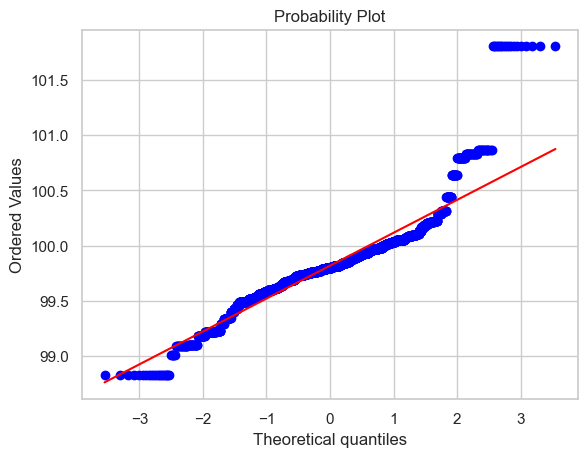

In [77]:
stats.probplot(df.us_cpi, dist="norm", plot=plt);

Всё же и эта выборка не является нормальной, а значит снова следует использовать тест Уилкоксона

In [80]:
stat, p_value = stats.wilcoxon(df.us_cpi-100, alternative='greater')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


> Здесь же ситуация интереснее: нулевая гипотеза не отверглась, то есть, действительно, __ежемесячная инфляция в США статистически не значима__.

Но это может означать баланс инфляции с дефляцией, поэтому стоит проверить и на наличие дефляции:

In [19]:
stat, p_value = stats.wilcoxon(df.us_cpi-100, alternative='less')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


> А вот уже __ежемесячная дефляция, как мы видим, статистически значима в США__. Необычный результат, учитывая, что в последнее время мы слышим только об инфляции в западных странах

### 3. Серия гипотез о доходностях активов 

После анализа визуализаций на шаге 4, мы пришли к выводам, что золото, доллар и индекс Мосбиржи (реплицировав его структуру) выгодно брать в "лонг" (математическое ожидание доходностей неотрицательно). Проверим эти гипотезы с помощью математической статистики.

#### 3.1. Математическое ожидание доходности вложения в индекс IMOEX неотрицательно:

$$
\begin{aligned}
& H_0: \mu_{imoex} = 0 \\
& H_1: \mu_{imoex} < 0
\end{aligned}
$$

где $\mu_{imoex}$ - математическое ожидание доходности индекса IMOEX по отношению к предыдущему дню

_Для начала посчитаем доходность индекса:_

In [42]:
imoex_for_returns = df['imoex_open'][df['imoex_open'] != 0]

return_imoex = (imoex_for_returns / imoex_for_returns.shift() - 1).dropna() * 100

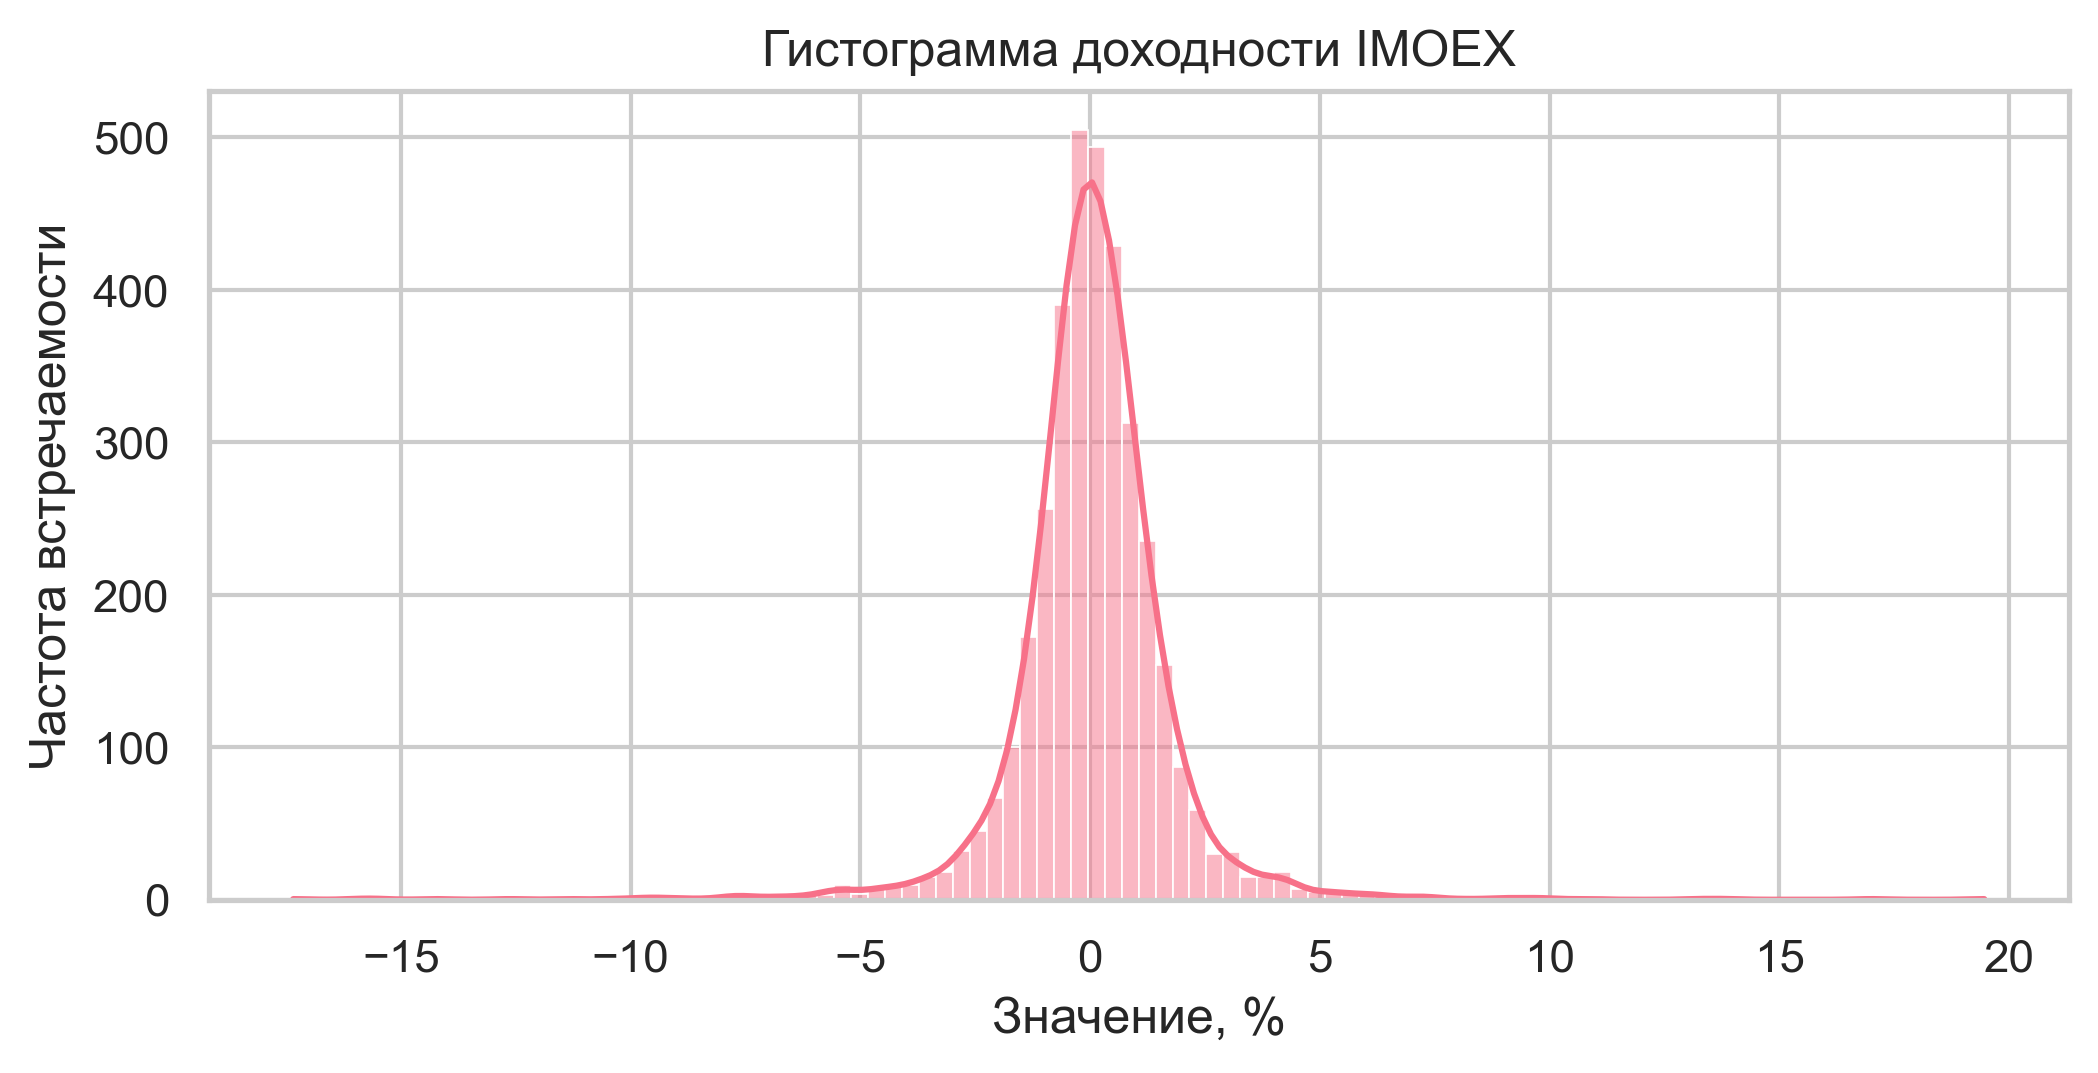

In [56]:
plt.figure(figsize=(8,3.5), dpi=300)

sns.histplot(return_imoex, bins=100, kde=True)
plt.title('Гистограмма доходности IMOEX', fontsize=12)
plt.xlabel('Значение, %', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12);

>Распределение в целом, напоминает какое-то очень вытянутое нормальное. Посмотрим, насколько сильно оно близко к нормальному, с помощью Q-Q рапсределения:

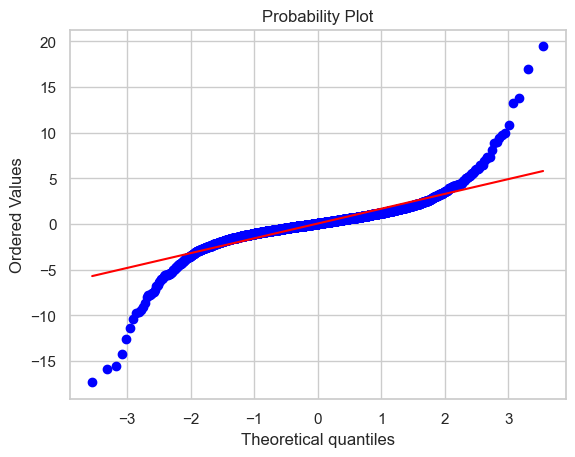

In [45]:
stats.probplot(return_imoex, dist="norm", plot=plt);

>Видим, что распределение не похоже на нормальное. В таком случае будем использовать `тест Уилкоксона`. 

Этот тест является непараметрическим аналогом t-теста для одной выборки, когда данные не удовлетворяют требованию нормальности распределения или содержат выбросы. Он позволяет сравнить среднее значение выборки с некоторым фиксированным значением или средним значением в другой выборке, основан на ранжировании разностей между наблюдениями и фиксированным значением:

In [23]:
stat, p_value = stats.wilcoxon(return_imoex-0, alternative='less')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


>Итак, мы видим, что __вкладываться в IMOEX - это не убыточно__, то есть не принесет отрицательные доходности в долгосрочной перспективе, что приятно и интересно

#### 3.2. Математическое ожидание доходности вложения в золото неотрицательно:

$$
\begin{aligned}
& H_0: \mu_{gold} = 0 \\
& H_1: \mu_{gold} < 0
\end{aligned}
$$

где $\mu_{gold}$ - математическое ожидание доходности золота по отношению к предыдущему дню

_Для начала посчитаем доходность золота:_

In [53]:
gold_for_returns = df['gold'][df['gold'] != 0]

return_gold = (gold_for_returns / gold_for_returns.shift() - 1).dropna() * 100

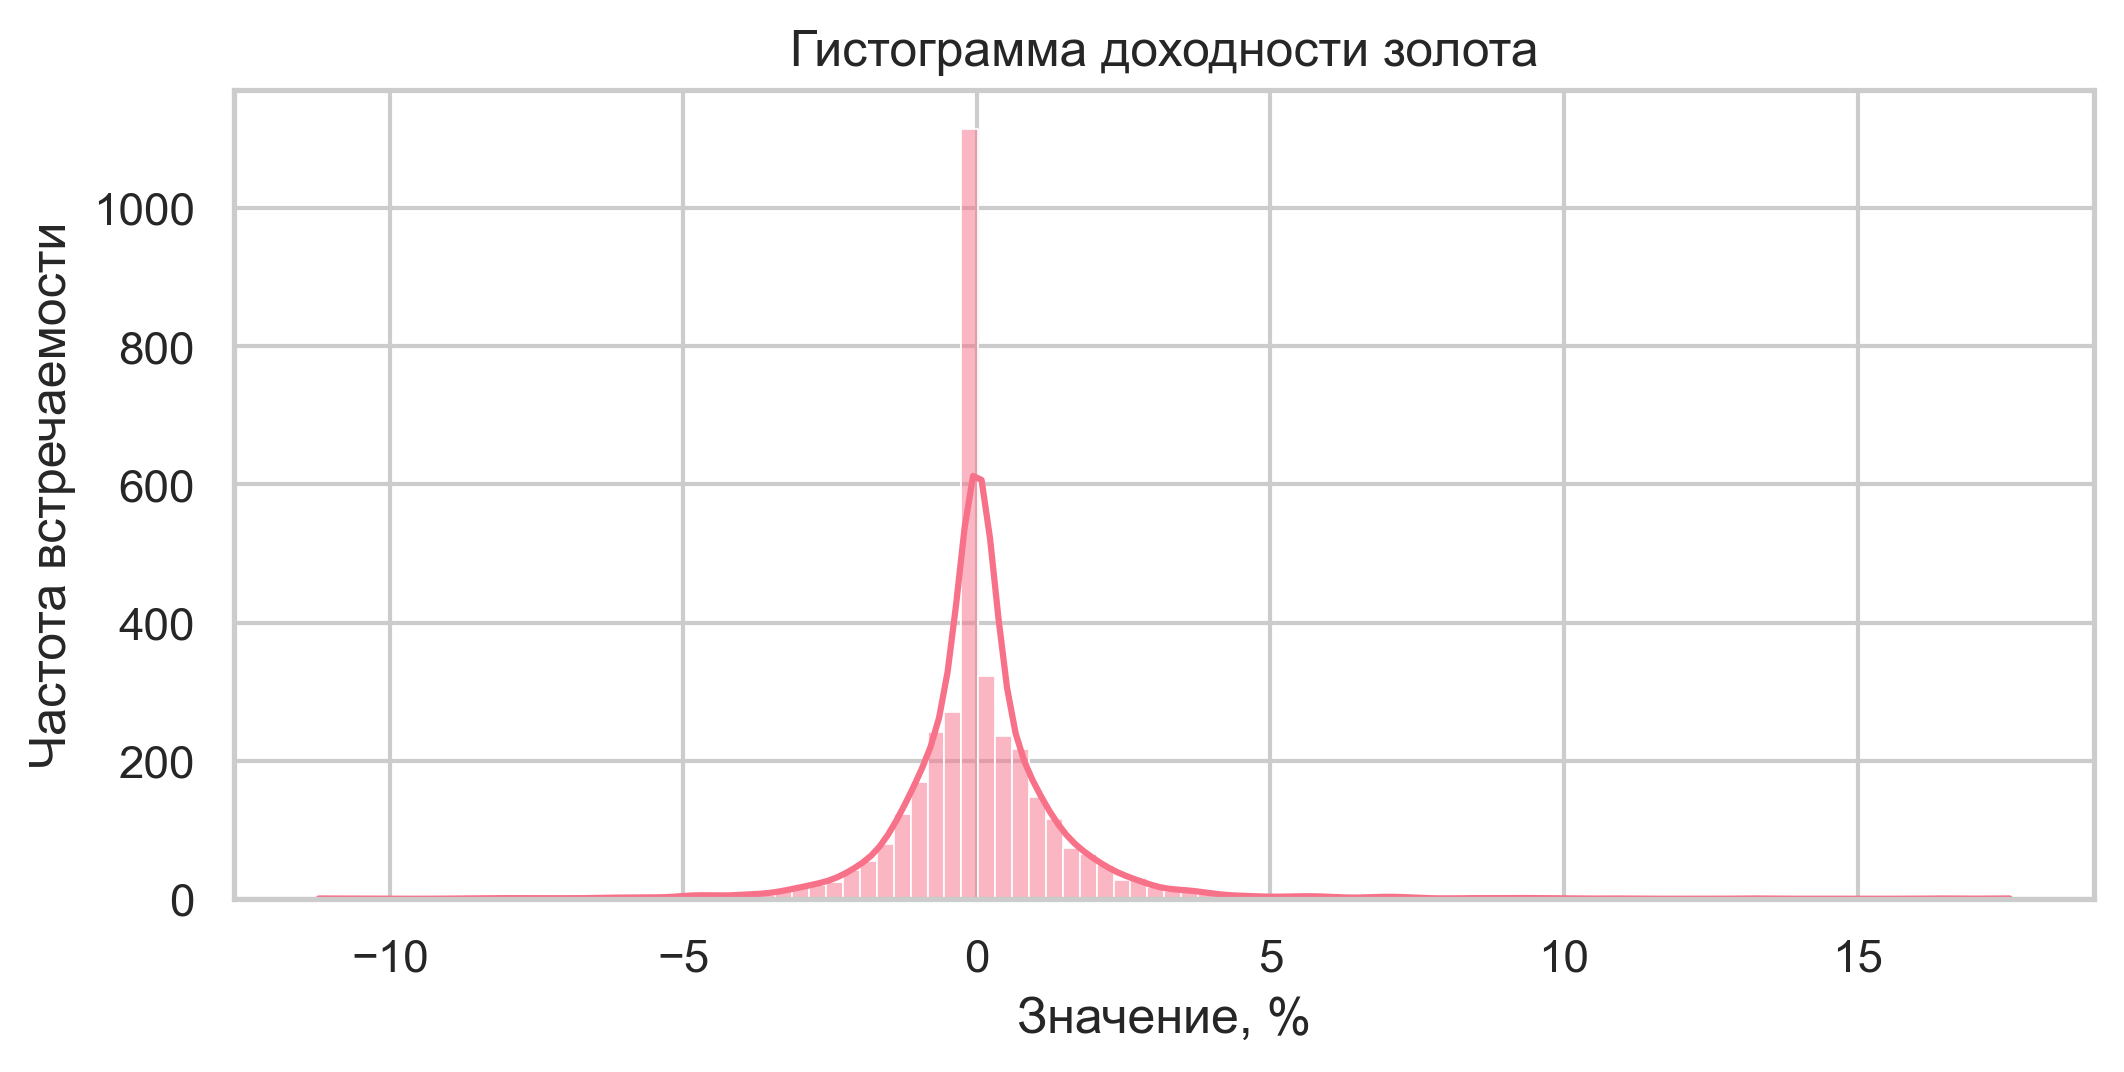

In [55]:
plt.figure(figsize=(8,3.5), dpi=300)

sns.histplot(return_gold, bins=100, kde=True)
plt.title('Гистограмма доходности золота', fontsize=12)
plt.xlabel('Значение, %', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12);

>Видим, что распределение напоминает нормальное, однако также видим, что доходность по большей части отрицательная. 

Посмотрим, сможем ли мы пользоваться t-тестом или надо будет опять брать Уилкоксона:

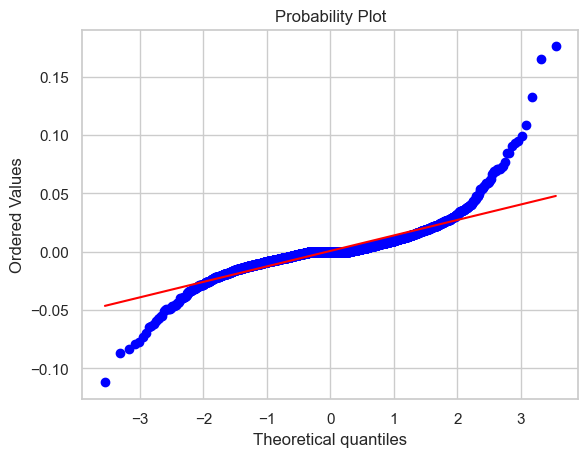

In [51]:
stats.probplot(return_gold, dist="norm", plot=plt);

>Думаем, надежнее опять использовать `тест Уилкоксона`:

In [52]:
stat, p_value = stats.wilcoxon(return_gold-0, alternative='less')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


>И все же видим, что вложения не отрицательны, значит __золото также неубыточно__.

#### 3.3. Математическое ожидание доходности вложения в доллар неотрицательно:

$$
\begin{aligned}
& H_0: \mu_{usdrub} = 0 \\
& H_1: \mu_{usdrub} < 0
\end{aligned}
$$

где $\mu_{usdrub}$ - математическое ожидание доходности доллара по отношению к предыдущему дню

_Для начала посчитаем доходность доллара:_

In [58]:
usdrub_for_returns = df['usdrub'][df['usdrub'] != 0]

return_usdrub = (usdrub_for_returns / usdrub_for_returns.shift() - 1).dropna() * 100

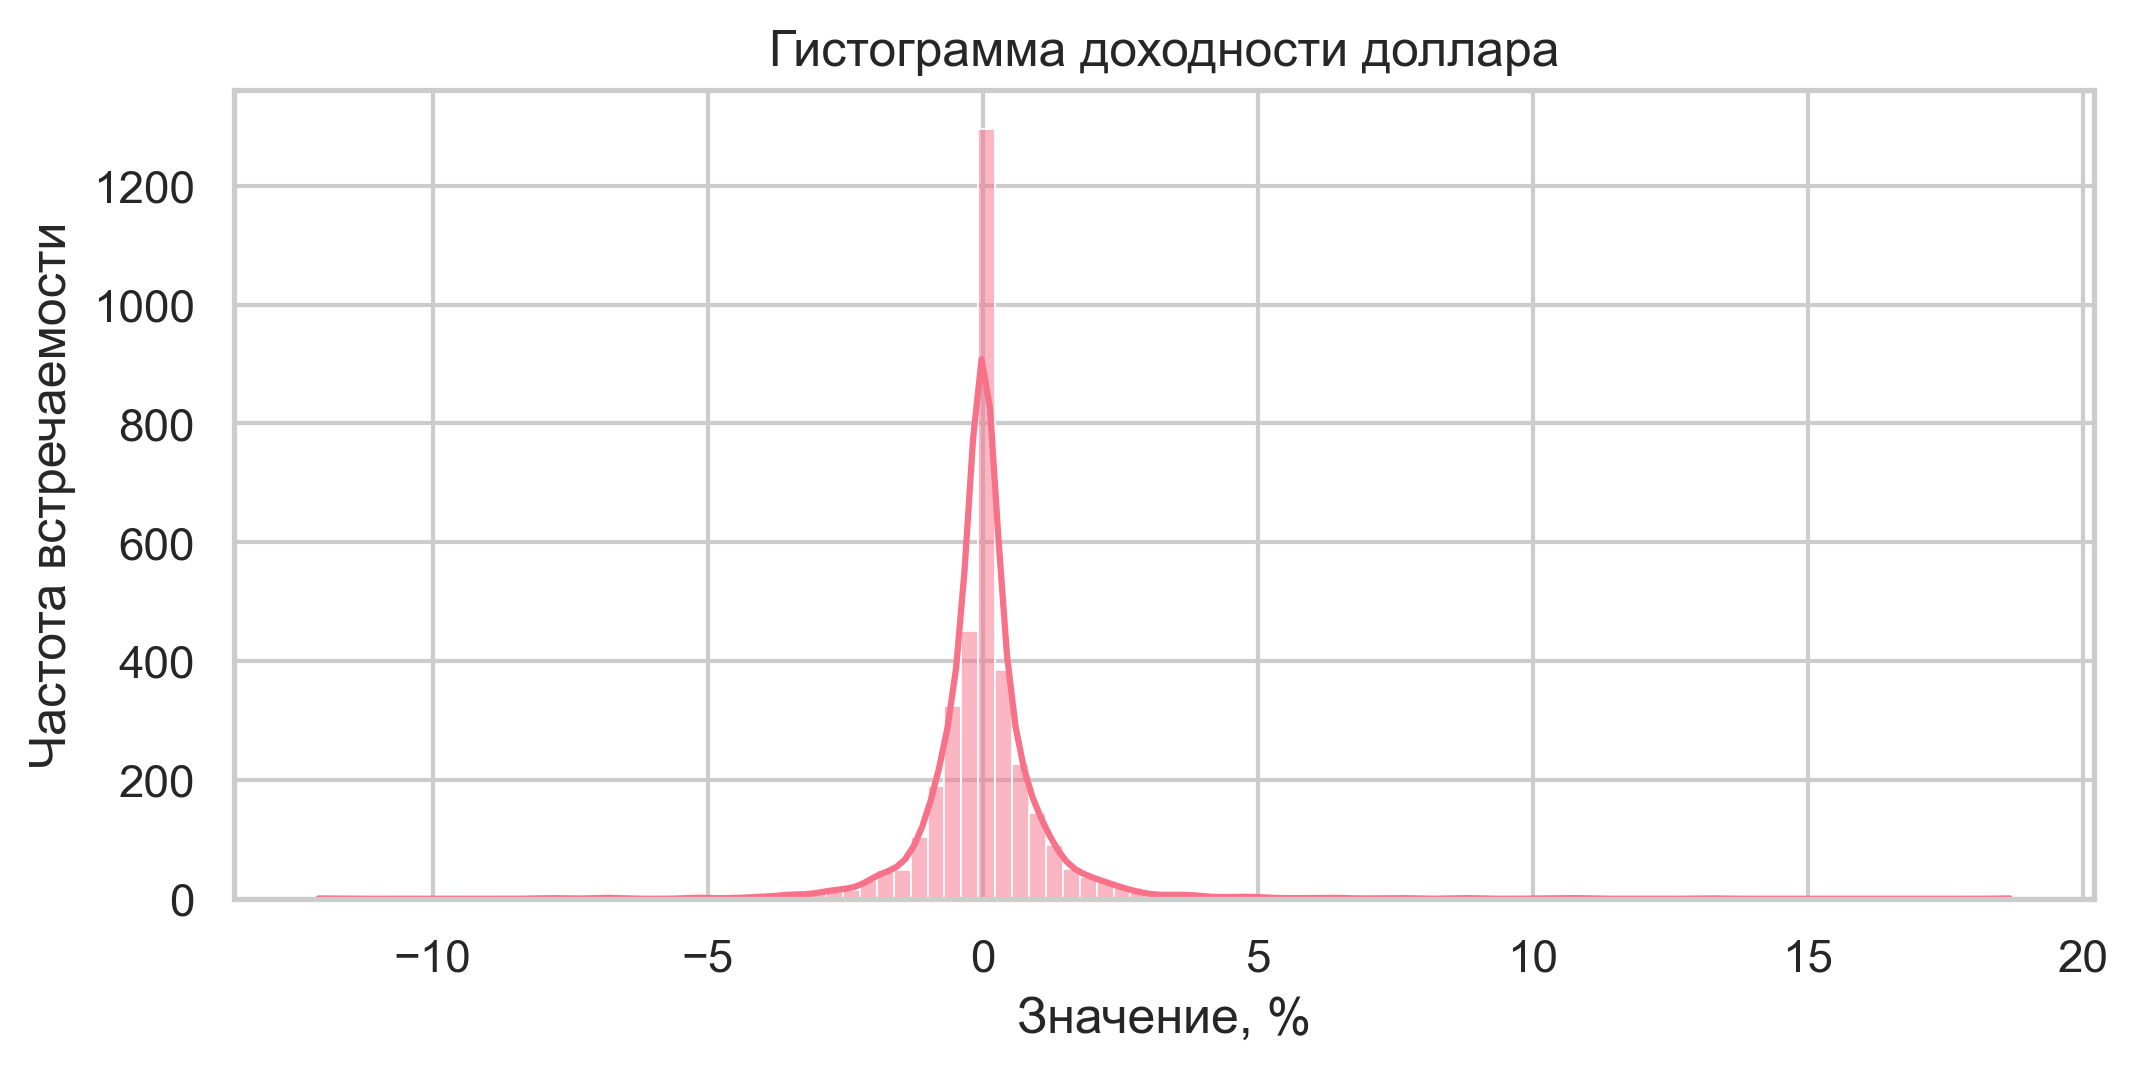

In [60]:
plt.figure(figsize=(8,3.5), dpi=300)

sns.histplot(return_usdrub, bins=100, kde=True)
plt.title('Гистограмма доходности доллара', fontsize=12)
plt.xlabel('Значение, %', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12);

> Повторяется та же картина, что и с индексом Мосбиржи и золотом

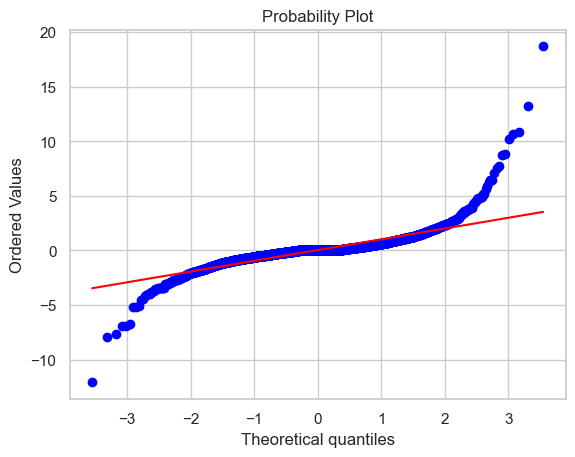

In [61]:
stats.probplot(return_usdrub, dist="norm", plot=plt);

>В очередной раз `тест Уилкоксона`:

In [62]:
stat, p_value = stats.wilcoxon(return_usdrub-0, alternative='less')

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


> Доллар также неубыточное вложение.\
Как итог, можно понять, что в любом случае рынок идет вверх и не приносит отрицательных доходностей в долгосрочной перспективе. Если он приносит их иногда, то это не значит, что так будет всегда. Надо верить в лучшее и уметь ждать :)

### 4. Серия гипотез, которые можно проверять с помощью ML

#### 4.1 Самым значимым признаком при предсказывании курса доллар рубль является цена золота

#### 4.2 Цена открытия IMOEX - второй показатель (после цены золота), на который стоит опираться при предсказывании курса доллар рубль

_Для того, чтобы проверить эти гипотезы, посмотрим на коэффициенты из Лассо регрессии из шага 7:_


In [63]:
coefs = pd.read_csv('step06_lasso_coeffs.txt', header=None, names=['coef'])

In [64]:
coefs['feature'] = df.drop('usdrub', axis=1).columns

coefs.sort_values(by='coef')

,coef,feature
12,-2.021000,us_monetary
4,-1.647074,imoex_close
5,0.082510,ru_cpi
7,0.190023,workday
8,0.386240,first_workday
9,0.389980,second_workday
10,0.543606,imoex_vol
11,1.173848,ru_monetary
2,2.099259,fed_rate
6,3.459960,us_cpi


>Итак, мы видим, что __обе эти гипотезы не верны__, так как ситуация оказались ровно противоположной: самый значимый признак - это цена открытия IMOEX, а второй после него - это цена золота. Этот вывод сделан исходя из того, что чем больше коэффициент, тем более значимым является признак, согласно линейной модели